## Unsupervised machine learning
In this type of ML, the data is not labeled. The main insight to the data is by understanding the way the data is clustered

In [2]:
## importing python libraries 
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as scio

In [3]:
## importing datasets
file_pth='./datasets/KMC_data1.mat'
datasets=scio.loadmat(file_pth)
print(datasets.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X'])


In [4]:
## dataset is stored in dictionary format and contained unlabeled data
X_trn=datasets['X']
print('Sample data points')
print(X_trn[:5,:])
m=X_trn.shape[0]
n=X_trn.shape[1]
print('Number of training examples m',m)
print('Number of features n',n)


Sample data points
[[3.38156267 3.38911268]
 [4.52787538 5.8541781 ]
 [2.65568187 4.41199472]
 [2.76523467 3.71541365]
 [2.84656011 4.17550645]]
Number of training examples m 50
Number of features n 2


Text(0.5, 1.0, 'Unlabeled data for visualization')

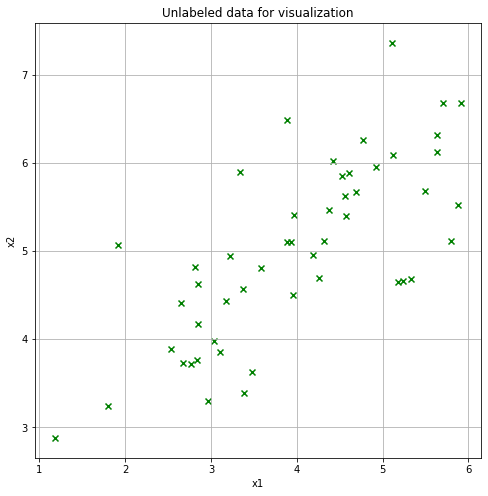

In [5]:
##Visualization of data is performed for better intuition
fig,ax=plt.subplots(figsize=(8,8))
ax.scatter(X_trn[:,0],X_trn[:,1],marker='x',color='g')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
plt.title('Unlabeled data for visualization')

#### From this dataset, i will be trying to find cluster and group similar data together using K-mean clustering


In [6]:
## implementation of K-mean clustering can be divided into 2 parts

# 1=compute the index of cluster i.e index of training example to which cluster the training example belongs

def cluster_index(X,C):
    m=X.shape[0]
    n=X.shape[1]
    index=np.zeros((m,1))
    for i in range(m):
        index[i]=np.argmin(np.sum(X_trn[i,:]-C,axis=1)**2)
    return index.ravel()

K = 2
initial_centroids = np.array([[3, 3],[6, 2]])
index=cluster_index(X_trn,initial_centroids)
print('Indices of the cluster training',index.T)

Indices of the cluster training [0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0.
 1. 1.]


In [7]:
#2= From the obtained indices of training examples cluster location, we compute the centroid of training example
#and update our centroid location
def cluster_centroid(X,index,K):
    m=X.shape[0]
    n=X.shape[1]
    centroid=np.zeros((K,n))
    for i in range(K):
        ind=X_trn[index==i]
        centroid[i,:]=np.mean(ind,axis=0)
    return centroid
updated_centroid=cluster_centroid(X_trn,index,K)
print(updated_centroid)

[[2.51588893 3.68426663]
 [4.35760937 5.33244065]]


In [8]:
def K_mean_clustering(X,initial_centroid,num_iter=100):
    K=initial_centroid.shape[0]
    m=X.shape[0]
    n=X.shape[1]
    index=np.zeros((m,1))
    centroid=initial_centroids
    for i in range(num_iter):
        index=cluster_index(X_trn,centroid)
        centroid=cluster_centroid(X_trn,index,K)
    return index,centroid

K = 2
initial_centroids = np.array([[3, 3],[6, 2]])
y,centroid=K_mean_clustering(X_trn,initial_centroids,10)
print(y)

[0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1.
 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0.
 0. 1.]


Text(0.5, 1.0, 'Clustering using K-mean algorthimk=2')

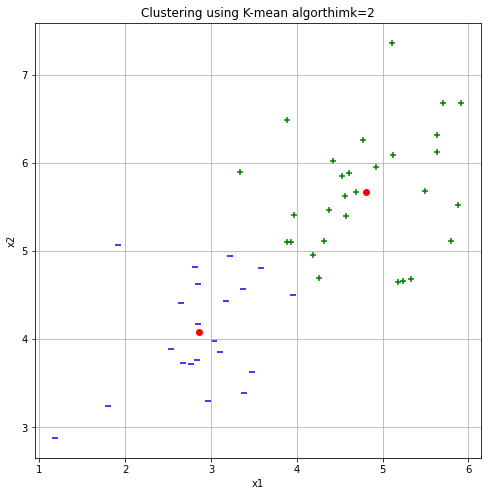

In [9]:
Cluster1=X_trn[y==1]
Cluster2=X_trn[y==0]
fig,ax=plt.subplots(figsize=(8,8))
ax.scatter(Cluster1[:,0],Cluster1[:,1],marker='+',color='g')
ax.scatter(Cluster2[:,0],Cluster2[:,1],marker='_',color='b')
ax.scatter(centroid[:,0],centroid[:,1],marker='o',color='r')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
plt.title('Clustering using K-mean algorthimk={}'.format(K))

In [10]:
file_pth='./datasets/KMC_data2.mat'
datasets=scio.loadmat(file_pth)
print(datasets.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X'])


In [11]:
X_trn=datasets['X']
print('Sample data points')
print(X_trn[:5,:])
m=X_trn.shape[0]
n=X_trn.shape[1]
print('Number of training examples m',m)
print('Number of features n',n)

Sample data points
[[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
Number of training examples m 300
Number of features n 2


Text(0.5, 1.0, 'Unlabeled data for visualization')

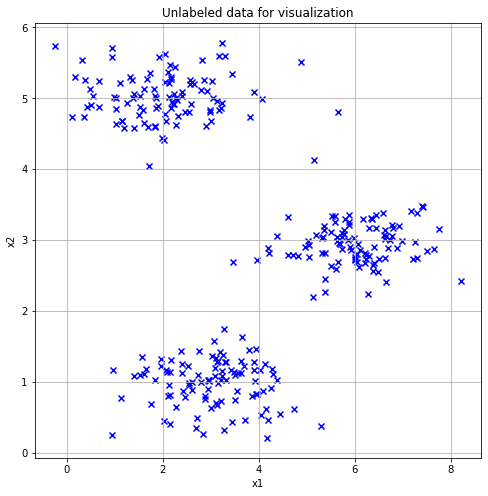

In [12]:
fig,ax=plt.subplots(figsize=(8,8))
ax.scatter(X_trn[:,0],X_trn[:,1],marker='x',color='b')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
plt.title('Unlabeled data for visualization')

In [13]:
K = 3
initial_centroids = np.array([[3, 3],[6, 2],[0,2]])
y,centroid=K_mean_clustering(X_trn,initial_centroids,100)
print(centroid)

[[2.31395314 4.41103471]
 [5.71386836 3.38067872]
 [2.84245021 1.09892596]]


Text(0.5, 1.0, 'Clustering using K-mean algorthim k=3')

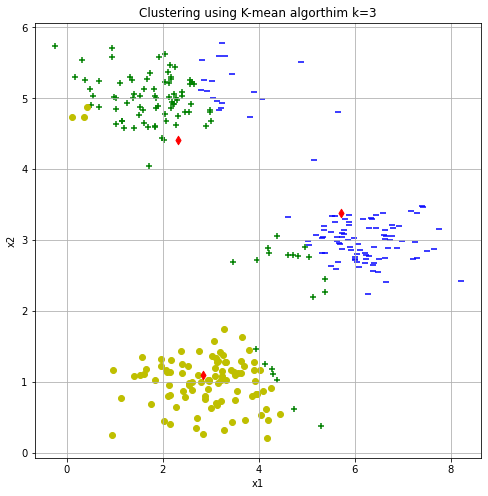

In [14]:
Cluster1=X_trn[y==0]
Cluster2=X_trn[y==1]
Cluster3=X_trn[y==2]
fig,ax=plt.subplots(figsize=(8,8))
ax.scatter(Cluster1[:,0],Cluster1[:,1],marker='+',color='g')
ax.scatter(Cluster2[:,0],Cluster2[:,1],marker='_',color='b')
ax.scatter(Cluster3[:,0],Cluster3[:,1],marker='o',color='y')
ax.scatter(centroid[:,0],centroid[:,1],marker='d',color='r')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
plt.title('Clustering using K-mean algorthim k={}'.format(K))

In [15]:
## performing random initialization
import random
K = 3
m=X_trn.shape[0]
list=np.arange(0,m)
index=random.choices(X_trn,k=3)
print(index[1])
initial_centroids = np.array([index[0],index[1],index[2]])
print(initial_centroids)
y,centroid=K_mean_clustering(X_trn,initial_centroids,100)

[3.12635184 1.2806893 ]
[[2.54371489 0.95732716]
 [3.12635184 1.2806893 ]
 [4.06069132 4.99503862]]


Text(0.5, 1.0, 'Clustering using K-mean algorthim using random init k=3')

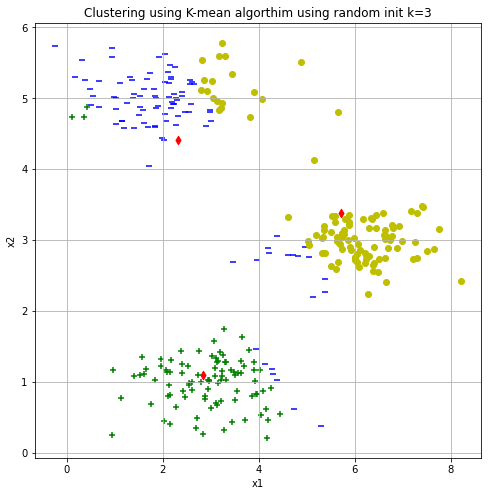

In [16]:
Cluster1=X_trn[y==0]
Cluster2=X_trn[y==1]
Cluster3=X_trn[y==2]
fig,ax=plt.subplots(figsize=(8,8))
ax.scatter(Cluster1[:,0],Cluster1[:,1],marker='+',color='g')
ax.scatter(Cluster2[:,0],Cluster2[:,1],marker='_',color='b')
ax.scatter(Cluster3[:,0],Cluster3[:,1],marker='o',color='y')
ax.scatter(centroid[:,0],centroid[:,1],marker='d',color='r')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
plt.title('Clustering using K-mean algorthim using random init k={}'.format(K))

#### From both the visualization we can see that K-mean clustering depends on the initial inputs

In [17]:
## Kmeans using standard library
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy import linalg

The size of the image (128, 128, 3)


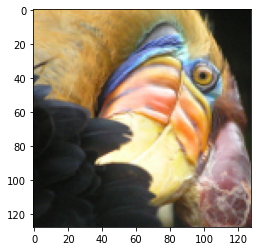

In [38]:
file_pth='datasets/bird_small.png'
img = plt.imread(file_pth)
plt.imshow(img)
img_shape = img.shape
print('The size of the image',img_shape)

In [39]:
print('Normalizing the image and reshaping it to feed to Kmeans')
A = img/255
m0=A.shape[0]
n0=A.shape[1]
A = A.reshape(m0*n0,3)
m=A.shape[0]
n=A.shape[1]
print('Number of training examples m',m)
print('Numbet of features n',n)

Normalizing the image and reshaping it to feed to Kmeans
Number of training examples m 16384
Numbet of features n 3


In [40]:
## using scikit learn library's K-mean clustering to compress the image based on number of color K
K=25
k_mean = KMeans(K)
k_mean.fit(A)
Compressed_image = k_mean.cluster_centers_[k_mean.labels_].reshape(m0, n0, 3)

Text(0.5, 1.0, 'Compressed, with 25"" colors')

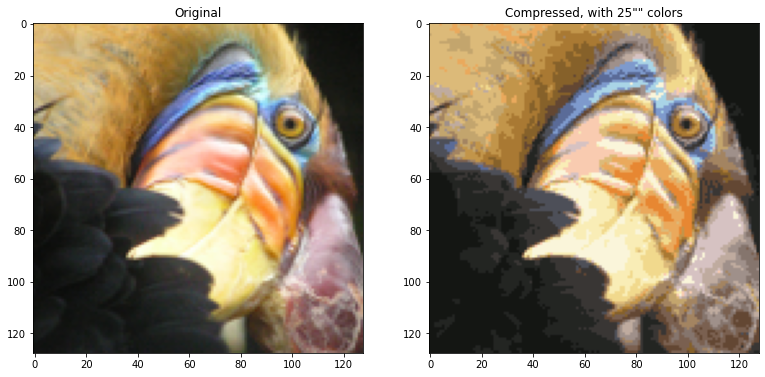

In [41]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,9))
ax1.imshow(img)
ax1.set_title('Original')
ax2.imshow(Compressed_image*255)
ax2.set_title('Compressed, with {}"" colors'.format(K))
